In [38]:
# initial condition and constants
import numpy as np
# Constants
g = 9.81  # gravitational acceleration (m/s^2)
L1 = 1.0  # length of the first pendulum (m)
L2 = 0.5  # length of the second pendulum (m)
m1 = 5.0  # mass of the first pendulum (kg)
m2 = 1.0  # mass of the second pendulum (kg)

# Initial conditions
theta1_0 = 5 * np.pi / 180      # initial angle of the first pendulum (rad)
theta2_0 = -10 * np.pi / 180    # initial angle of the second pendulum (rad)
z1_0 = 10.0 * np.pi / 180       # initial angular velocity of the first pendulum (rad/s)
z2_0 = 0.0                      # initial angular velocity of the second pendulum (rad/s)


In [39]:
# inisiasi eigenvalue - eigenvector
max_error = 1E-12     # batas error
a = np.array([[L1 / g,  (m2 * L2)/((m1 + m2) * g)], 
              [L1 / g,  L2 / g]])

# pencarian eigenvalue metode QR
i=0
while abs(a[1,0]) > max_error:
    q, r = np.linalg.qr(a)
    a = np.dot(r, q)
    i += 1

print(f'Final a in iteration {i}:')
print(a)
omega_a=1/np.sqrt(a[0,0])
omega_b = 1 / np.sqrt(a[1,1])
print("Omega_a:",omega_a,"Omega_b:",omega_b)

# pencarian eigenvector
k_a = L1 / (g * a[0,0] - L2)
k_b = L1 / (g * a[1,1] - L2)
print("A2_a/A1_a:",k_a)
print("A2_b/A1_b:",k_b)

Final a in iteration 22:
[[ 1.15380358e-01 -9.34420659e-02]
 [ 7.87877391e-13  3.75248412e-02]]
Omega_a: 2.943974606960054 Omega_b: 5.162268252829844
A2_a/A1_a: 1.5825756949326055
A2_b/A1_b: -7.582575694422493


In [40]:
# analytic solution function
A_1a = (k_b * theta1_0 - theta2_0) / (k_b - k_a)
A_1b = (k_a * theta1_0 - theta2_0) / (k_a - k_b)
alpha_b = (k_a * z1_0 - z2_0) / ((k_a - k_b) * A_1b * omega_b)
alpha_a = (k_b * z1_0 - z2_0) / ((k_b - k_a) * A_1a * omega_a)
def analytic_theta1(t):
    c_a = np.cos(omega_a * t)
    s_a = np.sin(omega_a * t)
    c_b = np.cos(omega_b * t)
    s_b = np.sin(omega_b * t)
    return A_1a * (c_a + alpha_a * s_a) + A_1b * (c_b + alpha_b * s_b)

def analytic_theta2(t):
    c_a = np.cos(omega_a * t)
    s_a = np.sin(omega_a * t)
    c_b = np.cos(omega_b * t)
    s_b = np.sin(omega_b * t)
    return A_1a * k_a * (c_a + alpha_a * s_a) + A_1b * k_b * (c_b + alpha_b * s_b)

In [41]:
#numerical solution
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Equations of motion
def equations(t, y):
    theta1, z1, theta2, z2 = y

    delta_theta = theta1 - theta2

    denom1 = L1 * (2 * m1 + m2 - m2 * np.cos(2 * delta_theta))
    denom2 = L2 * (2 * m1 + m2 - m2 * np.cos(2 * delta_theta))

    theta1_dot = z1
    theta2_dot = z2

    z1_dot = (
        -g * (2 * m1 + m2) * np.sin(theta1)
        - m2 * g * np.sin(theta1 - 2 * theta2)
        - 2 * np.sin(delta_theta) * m2 * (L2 * z2**2 + L1 * z1**2 * np.cos(delta_theta))
    ) / denom1

    z2_dot = (
        2 * np.sin(delta_theta)
        * (
            L1 * (m1 + m2) * z1**2
            + g * (m1 + m2) * np.cos(theta1)
            + L2 * m2 * z2**2 * np.cos(delta_theta)
        )
    ) / denom2

    return [theta1_dot, z1_dot, theta2_dot, z2_dot]

# Time span and resolution
t_span = (0, 10)  # time range (s)
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # time points for evaluation

# Solve the system of ODEs
initial_conditions = [theta1_0, z1_0, theta2_0, z2_0]
solution = solve_ivp(equations, t_span, initial_conditions, t_eval=t_eval, method="RK45")


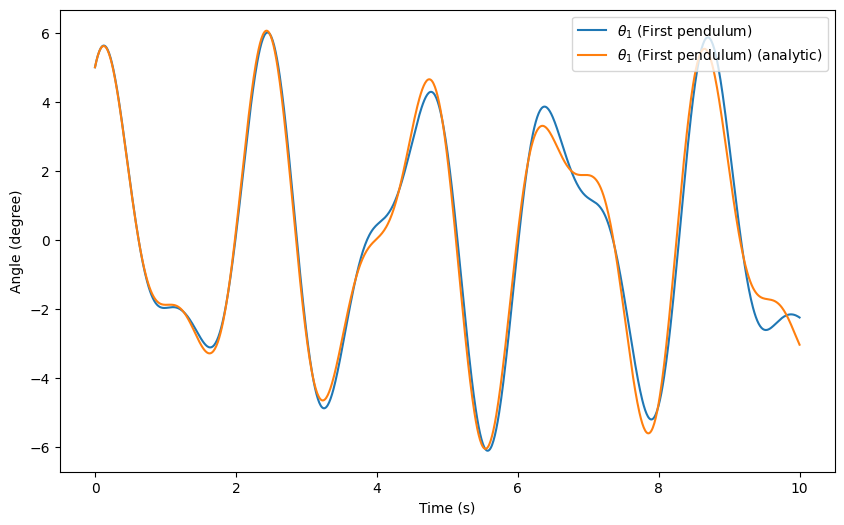

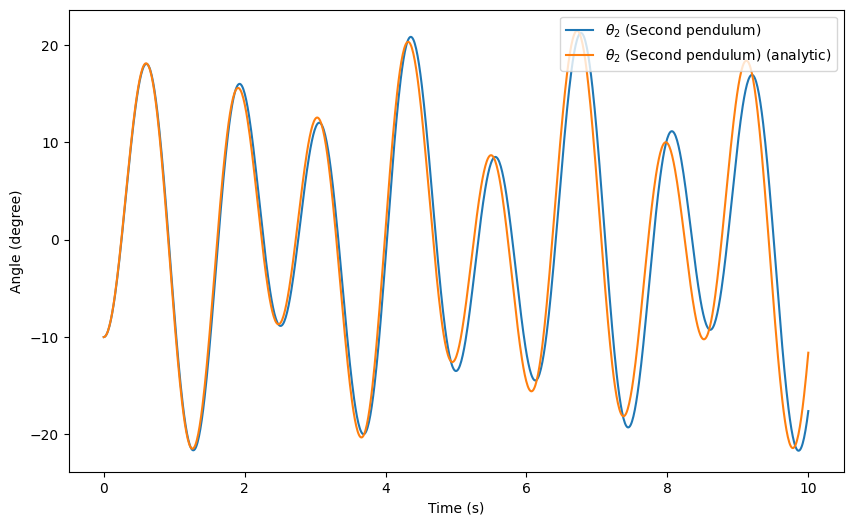

In [53]:
# Extract solutions
t = solution.t
y1 = solution.y[0]  # theta1
y2 = solution.y[2]  # theta2

analytic_y1 = analytic_theta1(t)
analytic_y2 = analytic_theta2(t)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, y1 * 180/np.pi, label=r"$\theta_1$ (First pendulum)")
# plt.plot(t, y2, label=r"$\theta_2$ (Second pendulum)")
plt.plot(t, analytic_y1 * 180/np.pi, label=r"$\theta_1$ (First pendulum) (analytic)")
# plt.plot(t, analytic_y2, label=r"$\theta_2$ (Second pendulum) (analytic)")
# plt.title("Double Pendulum Motion")
plt.xlabel("Time (s)")
plt.ylabel("Angle (degree)")
plt.legend(loc='upper right')
# plt.grid()
plt.show()

# Plot the results
plt.figure(figsize=(10, 6))
# plt.plot(t, y1, label=r"$\theta_1$ (First pendulum)")
plt.plot(t, y2* 180/np.pi, label=r"$\theta_2$ (Second pendulum)")
# plt.plot(t, analytic_y1, label=r"$\theta_1$ (First pendulum) (analytic)")
plt.plot(t, analytic_y2* 180/np.pi, label=r"$\theta_2$ (Second pendulum) (analytic)")
# plt.title("Double Pendulum Motion")
plt.xlabel("Time (s)")
plt.ylabel("Angle (degree)")
plt.legend(loc='upper right')
# plt.grid()
plt.show()

Hasil parameter:
A = 0.053118151919085824, w_a = 2.943953685399246, a = 0.9196655547287979
B = 0.03410899102880121, w_b = 5.114650444036219, b = 0.17963941306348757
Hasil parameter:
A = 0.053118151919085824, w_a = 2.943953685399246, a = 0.9196655547287979
B = 0.03410899102880121, w_b = 5.114650444036219, b = 0.17963941306348757


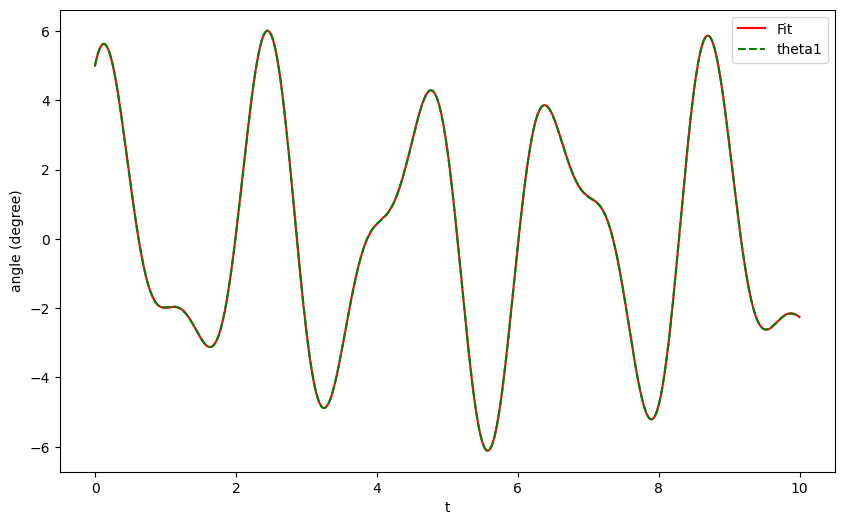

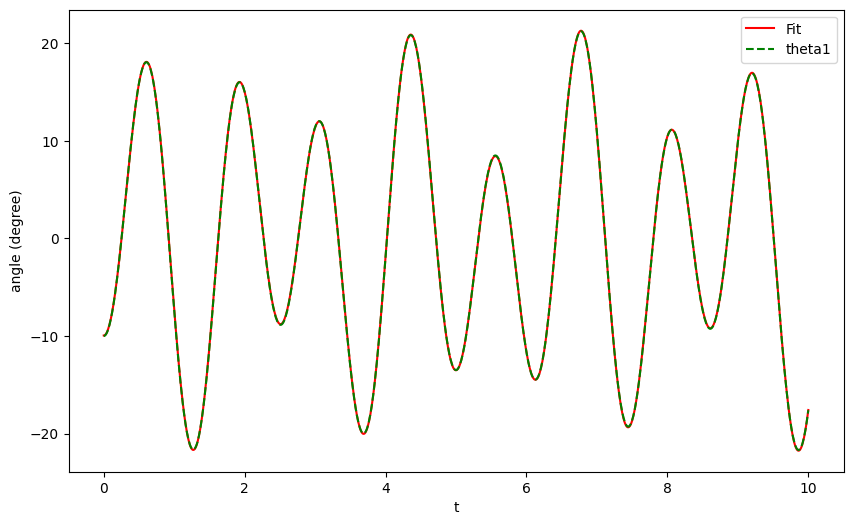

In [54]:
# regresi nonlinear
from scipy.optimize import curve_fit
# Fungsi model
def trig_function(t, A, w_a, a, B, w_b, b):
    return A * (np.cos(w_a * t) + a * np.sin(w_a * t)) + B * (np.cos(w_b * t) + b * np.sin(w_b * t))

# Data sintetis
x_data = np.linspace(0, 10, 100)
A_true, w_a_true, a_true = 2.0, 1.0, 0.5
B_true, w_b_true, b_true = 1.5, 0.8, 0.2
y_data = trig_function(x_data, A_true, w_a_true, a_true, B_true, w_b_true, b_true)
y_data_noisy = y_data + np.random.normal(0, 0.2, len(y_data))  # Tambahkan noise

# Regresi nonlinier
initial_guess1 = [A_1a, omega_a, alpha_a, A_1b, omega_b, alpha_b]  # Tebakan awal untuk A, w_a, a, B, w_b, b
params1, covariance = curve_fit(trig_function, t, y1, p0=initial_guess1)
initial_guess2 = [A_1a * k_a, omega_a, alpha_a, A_1b * k_b, omega_b, alpha_b]  # Tebakan awal untuk A, w_a, a, B, w_b, b
params2, covariance = curve_fit(trig_function, t, y2, p0=initial_guess1)

# Hasil parameter
A_fit1, w_a_fit1, a_fit1, B_fit1, w_b_fit1, b_fit1 = params1
print("Hasil parameter:")
print(f"A = {A_fit1}, w_a = {w_a_fit1}, a = {a_fit1}")
print(f"B = {B_fit1}, w_b = {w_b_fit1}, b = {b_fit1}")

A_fit2, w_a_fit2, a_fit2, B_fit2, w_b_fit2, b_fit2 = params1
print("Hasil parameter:")
print(f"A = {A_fit2}, w_a = {w_a_fit2}, a = {a_fit2}")
print(f"B = {B_fit2}, w_b = {w_b_fit2}, b = {b_fit2}")

# Plot hasil
plt.figure(figsize=(10, 6))
# plt.scatter(t, y1, label='y1', s=10)
plt.plot(t, trig_function(t, *params1) * 180 / np.pi, label='Fit', color='red')
plt.plot(t, y1 * 180 / np.pi, label='theta1', color='green', linestyle='dashed')
plt.legend(loc="upper right")
plt.xlabel('t')
plt.ylabel('angle (degree)')
# plt.title('Regresi Nonlinier pada Fungsi Trigonometri')
plt.show()

# Plot hasil
plt.figure(figsize=(10, 6))
# plt.scatter(t, y1, label='y1', s=10)
plt.plot(t, trig_function(t, *params2) * 180 / np.pi, label='Fit', color='red')
plt.plot(t, y2 * 180 / np.pi, label='theta1', color='green', linestyle='dashed')
plt.legend(loc="upper right")
plt.xlabel('t')
plt.ylabel('angle (degree)')
# plt.title('Regresi Nonlinier pada Fungsi Trigonometri')
plt.show()